In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
os.chdir('F:\TopMentor_DataScience\Batch 103 Day 36')
os.getcwd()

'F:\\TopMentor_DataScience\\Batch 103 Day 36'

In [6]:
df1=pd.read_csv('Social_Network_Ads.csv')
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0
...,...,...,...,...,...
395,10220446,Female,20,141231,1
396,12387292,Male,50,75848,1
397,10715173,Female,25,82560,1
398,10016842,Male,55,147667,0


In [31]:
x=df1.iloc[:,2:4].values
y=df1.iloc[:,4:].values
#print(x.shape)
#print(y)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss=StandardScaler()
x=ss.fit_transform(x)
x.shape

(400, 2)

In [77]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=.2)

In [78]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(x_train, y_train)
y_pred=svc.predict(x)
print(y_pred.shape)
print(y_train.shape)
print(y.shape)

(400,)
(320, 1)
(400, 1)


C:\Users\SUDHARSHAN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
df_ypred = pd.DataFrame(y_pred,columns = ['Sigmoid Prediction'])
result = pd.concat ([df1,df_ypred],axis = 1 )
#display (result.head(50))
result

,User ID,Gender,Age,EstimatedSalary,Purchased,Sigmoid Prediction
0,11021175,Male,42,121315,0,1
1,17782313,Male,53,67214,0,0
2,14603818,Female,59,111005,0,0
3,18188198,Female,39,53414,0,0
4,19357305,Male,39,114285,0,0
...,...,...,...,...,...,...
395,10220446,Female,20,141231,1,1
396,12387292,Male,50,75848,1,0
397,10715173,Female,25,82560,1,0
398,10016842,Male,55,147667,0,1


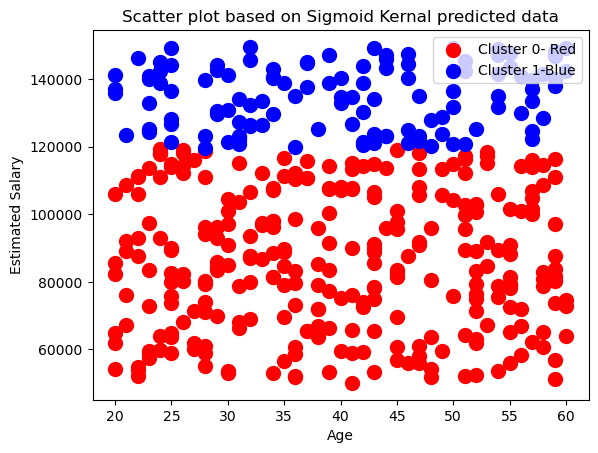

In [80]:
plt.scatter (x[y_pred  == 0,0],x[y_pred  == 0,1] ,s = 100, c='r', label = 'Cluster 0- Red')
plt.scatter (x[y_pred   == 1,0],x[y_pred   == 1,1] ,s = 100, c='b', label = 'Cluster 1-Blue')
plt.title ('Scatter plot based on Sigmoid Kernal predicted data')
plt.xlabel ('Age')
plt.ylabel ('Estimated Salary')
plt.legend(loc= 'upper right')
plt.show()


In [81]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y,y_pred))

y_pred.shape

0.5375


(400,)

In [82]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 0-Red')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 1-Blue')
plt.title ('Scatter plot based on input data')
plt.xlabel ('Age')
plt.ylabel ('Estimated Salary')
plt.legend(loc= 'upper right')
plt.show()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [83]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y,y_pred))


0.5375


In [87]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred,zero_division=0))


              precision    recall  f1-score   support

           0       0.63      0.69      0.66       257
           1       0.32      0.26      0.29       143

    accuracy                           0.54       400
   macro avg       0.47      0.48      0.47       400
weighted avg       0.52      0.54      0.52       400



In [89]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y,y_pred)
print (cm)


[[178  79]
 [106  37]]
